Q1
Lasso Regression (Least Absolute Shrinkage and Selection Operator):

Lasso Regression is a linear regression technique that introduces a regularization term to the ordinary least squares (OLS) cost function. The regularization term is based on the absolute values of the coefficients and is added to the sum of squared residuals. The objective function of Lasso Regression is:
Cost=OLS Cost+λ∑i=1∣wi∣

Differences from Other Regression Techniques:
Lasso introduces sparsity in the model by setting some coefficients exactly to zero. This property makes Lasso suitable for feature selection.
The choice of λ controls the trade-off between fitting the data well and keeping the model simple.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Choose an appropriate alpha value
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients of the model
coefficients = pd.DataFrame({'Feature': diabetes.feature_names, 'Coefficient': lasso_model.coef_})
print(coefficients)

Mean Squared Error: 2884.6242887352123
  Feature  Coefficient
0     age     1.730451
1     sex   -11.316359
2     bmi    25.824627
3      bp    16.644252
4      s1   -29.358412
5      s2    13.275844
6      s3     0.547948
7      s4    10.236168
8      s5    29.632826
9      s6     2.393475


#Q2
The main advantage of Lasso Regression in feature selection is its ability to automatically set some coefficients to exactly zero. This results in a sparse model, where only a subset of the features is considered important for predicting the target variable. Lasso's feature selection property is particularly useful in situations where there are many features, and some of them may be irrelevant or redundant.

#Q3
Interpreting the coefficients of a Lasso Regression model involves understanding the impact of each feature on the predicted outcome. Due to Lasso's sparsity-inducing property, some coefficients may be exactly zero, leading to a sparse model with feature selection. Let's go through a practical example to illustrate the interpretation of Lasso coefficients.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Consider the first feature (sepal length) as the target for illustration purposes
y_target = X[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Choose an appropriate alpha value
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients of the model
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_model.coef_})
print(coefficients)

Mean Squared Error: 0.010690214514419795
     Feature  Coefficient
0  Feature_0     0.720365
1  Feature_1    -0.000000
2  Feature_2     0.000000
3  Feature_3     0.000000


#Q4
The main tuning parameter in Lasso Regression is λ, also known as the regularization parameter. The higher the value of λ, the stronger the regularization, and the more coefficients will be set to zero. The tuning parameter affects the trade-off between fitting the data well and keeping the model simple.

A common practice is to perform cross-validation to find the optimal value of λ that minimizes a chosen performance metric (e.g., mean squared error). The optimal value is often selected based on the point where the cross-validated error is minimized.

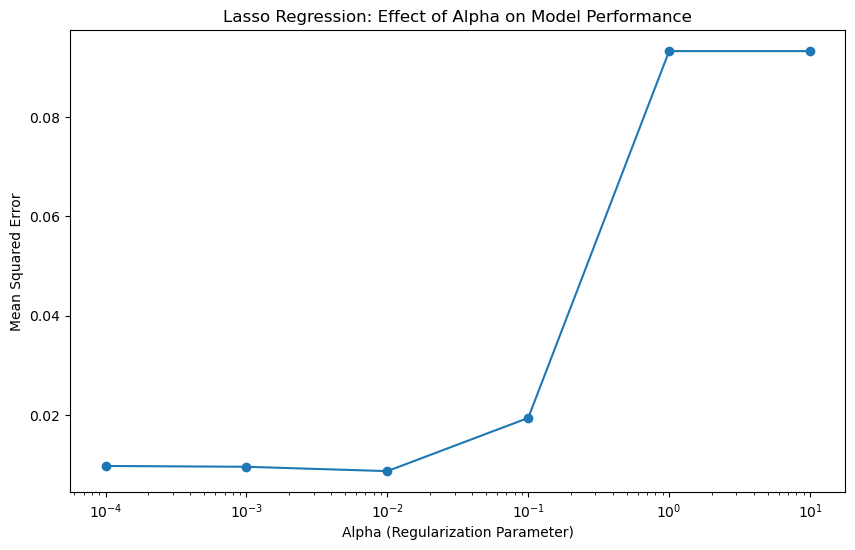

Coefficients for Alpha = 10.0
   Feature  Coefficient
0        1          0.0
1        2          0.0
2        3         -0.0
3        4          0.0
4        5         -0.0


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
true_coefficients = np.zeros(5)
true_coefficients[:2] = 1.0  # Only the first 2 features are relevant
y = X.dot(true_coefficients) + 0.1 * np.random.randn(100)  # Add some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values to test
alphas = np.logspace(-4, 1, 6)

# Train Lasso Regression models with different alpha values
mse_values = []
coefficients_list = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test_scaled)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Store the coefficients
    coefficients_list.append(lasso_model.coef_)

# Plot the mean squared error for different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Effect of Alpha on Model Performance')
plt.show()

# Print the coefficients for the last alpha value
final_alpha = alphas[-1]
final_coefficients = pd.DataFrame({'Feature': range(1, 6), 'Coefficient': coefficients_list[-1]})
print(f"Coefficients for Alpha = {final_alpha}")
print(final_coefficients)

We generate a synthetic dataset with 5 features, where only the first 2 are relevant.

We train Lasso Regression models with different alpha values.

The mean squared error for each alpha is plotted to show how the regularization strength affects model performance.

The coefficients for the last alpha value are printed to illustrate the impact of regularization on feature selection.

Q5
Lasso Regression itself is a linear regression technique, and it's not inherently designed for handling non-linear relationships. However, you can extend Lasso Regression for non-linear regression problems by incorporating non-linear transformations of the features.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic non-linear data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 3 * X.squeeze() + 2 * np.sin(X.squeeze()) + np.random.normal(0, 1, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features to capture non-linear relationships
poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Create and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Choose an appropriate alpha value
lasso_model.fit(X_train_poly_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_poly_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 1.7695884411061247


We generate synthetic non-linear data with a sinusoidal relationship.

Polynomial features up to the third degree are created to capture the non-linear patterns.

Lasso Regression is applied to the transformed features.

The model is evaluated on the test set.

Q6
The main differences between Ridge Regression and Lasso Regression lie in the type of regularization they apply and the impact on the coefficients. Ridge uses L2 regularization (penalizing the squared values of coefficients), while Lasso uses L1 regularization (penalizing the absolute values of coefficients).

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Choose an appropriate alpha value
ridge_model.fit(X_train_scaled, y_train)

# Create and train Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Choose an appropriate alpha value
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for both models
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the performance of both models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")


Mean Squared Error (Ridge): 0.5558548589435973
Mean Squared Error (Lasso): 1.3106960720039365


Q7
Lasso Regression can handle multicollinearity to some extent by automatically selecting one variable from a group of highly correlated variables and setting the coefficients of the others to zero.

In [9]:
import numpy as np 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# Generate synthetic data with multicollinearity
X, y = make_regression(n_samples=100, n_features=3, noise=1, random_state=42)
X[:, 2] = X[:, 0] + X[:, 1]  # Introduce multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Choose an appropriate alpha value
lasso_model.fit(X_train_scaled, y_train)

# Print the coefficients of the model
coefficients = pd.DataFrame({'Feature': range(1, X.shape[1] + 1), 'Coefficient': lasso_model.coef_})
print(coefficients)

   Feature  Coefficient
0        1     0.000000
1        2    51.274548
2        3    33.701984


We generate synthetic data with multicollinearity by making one feature a linear combination of others.

Lasso Regression is applied to the data.

The coefficients of the Lasso model are printed, illustrating how it automatically selects one variable from the group of highly correlated variables.

In [10]:
#Q8
#Choosing the optimal value of the regularization parameter (λ) in Lasso Regression is commonly done through cross-validation.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso regression model
lasso_model = Lasso()

# Define a range of alpha values to test
alphas = np.logspace(-4, 4, 9)

# Perform GridSearchCV to find the optimal alpha
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train the Lasso model with the best alpha on the entire training set
final_lasso_model = Lasso(alpha=best_alpha)
final_lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = final_lasso_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print(f"Optimal alpha (lambda): {best_alpha}")

Mean Squared Error on Test Set: 0.5544913600832686
Optimal alpha (lambda): 0.001
